<a href="https://colab.research.google.com/github/Chonna86/Data-Sciens/blob/main/HomeWork_9/HW_9%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [7]:
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

In [8]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 9s 27ms/step - loss: 2.3053 - accuracy: 0.0728
Test accuracy: 0.07280000299215317


Epoch 1/10
375/375 [==============================] - 229s 604ms/step - loss: 0.5839 - accuracy: 0.7953 - val_loss: 0.4342 - val_accuracy: 0.8482
Epoch 2/10
375/375 [==============================] - 231s 616ms/step - loss: 0.4618 - accuracy: 0.8348 - val_loss: 0.4111 - val_accuracy: 0.8535
Epoch 3/10
375/375 [==============================] - 238s 635ms/step - loss: 0.4399 - accuracy: 0.8428 - val_loss: 0.3991 - val_accuracy: 0.8553
Epoch 4/10
375/375 [==============================] - 227s 606ms/step - loss: 0.4225 - accuracy: 0.8467 - val_loss: 0.3936 - val_accuracy: 0.8558
Epoch 5/10
375/375 [==============================] - 231s 616ms/step - loss: 0.4137 - accuracy: 0.8511 - val_loss: 0.3813 - val_accuracy: 0.8633
Epoch 6/10
375/375 [==============================] - 231s 616ms/step - loss: 0.4071 - accuracy: 0.8525 - val_loss: 0.3740 - val_accuracy: 0.8696
Epoch 7/10
375/375 [==============================] - 227s 605ms/step - loss: 0.3993 - accuracy: 0.8565 - val_loss: 0.3772 -

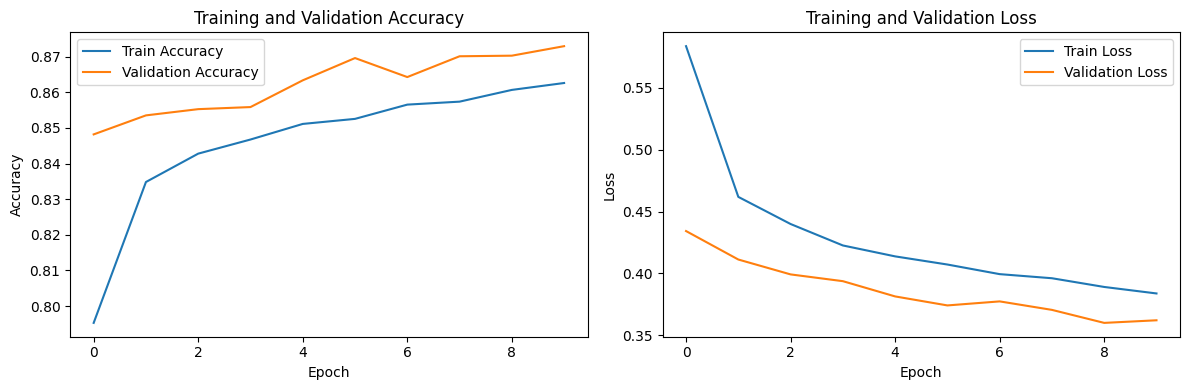

In [10]:
import matplotlib.pyplot as plt

# Візуалізація точності навчання та втрат на основі історії навчання
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Точність на навчальних та валідаційних даних
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Втрати на навчальних та валідаційних даних
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Навчання моделі з збереженням історії навчання
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

# Візуалізація історії навчання
plot_history(history)
